In [5]:
import numpy as np
import random as rd
import time
import pandas as pd
import matplotlib.pyplot as plt

In [190]:
!wget https://raw.githubusercontent.com/lukipuki0/MCDP/main/instancias.txt

--2024-06-08 20:13:58--  https://raw.githubusercontent.com/lukipuki0/MCDP/main/instancias.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2017 (2.0K) [text/plain]
Saving to: ‘instancias.txt.8’

instancias.txt.8    100%[===================>]   1.97K  --.-KB/s    in 0s      

2024-06-08 20:13:58 (25.7 MB/s) - ‘instancias.txt.8’ saved [2017/2017]



In [191]:
def leer_matriz(filename, posicion=0):
    with open(filename, 'r') as file:
        # Saltar a la posición especificada en el archivo
        for _ in range(posicion):
            file.readline()

        # Leer la línea de dimensiones y variables
        primera_linea = file.readline().strip()
        if not primera_linea:
            return None, None, None, None, None, posicion

        filas, columnas, celdas, maxMPC = map(int, primera_linea.split(','))

        # Leer la matriz
        matriz = []
        for _ in range(filas):
            fila = list(map(int, file.readline().strip().split(',')))
            matriz.append(fila)

        # Convertir la matriz a np.array
        matriz = np.array(matriz)

        # Nueva posición en el archivo
        nueva_posicion = posicion + filas + 1

        return filas, columnas, celdas, maxMPC, matriz, nueva_posicion

# Uso del código
filename = 'instancias.txt'
posicion = 0

In [192]:
#leer instncias
posicion=0
filas, columnas, celdas1, maxMPC1, matriz1, posicion = leer_matriz(filename, posicion)
piezas1 = matriz1.shape[0]
maquinas1 = matriz1.shape[1]

filas, columnas, celdas2, maxMPC2, matriz2, posicion = leer_matriz(filename, posicion)
piezas2 = matriz2.shape[0]
maquinas2 = matriz2.shape[1]

filas, columnas, celdas3, maxMPC3, matriz3, posicion = leer_matriz(filename, posicion)
piezas3 = matriz3.shape[0]
maquinas3 = matriz3.shape[1]

print("Instancia 1")
print("Matriz A")
print(matriz1)
print("")
print("Celdas:",celdas1)
print("Maquinas:",maquinas1)
print("piezas",piezas1)
print("Maximas maquinas por celda:", maxMPC1)
print("")

print("Instancia 2")
print("Matriz A")
print(matriz2)
print("")
print("Celdas:",celdas2)
print("Maquinas:",maquinas2)
print("piezas",piezas2)
print("Maximas maquinas por celda:", maxMPC2)
print("")

print("Instancia 3")
print("Matriz A")
print(matriz3)
print("")
print("Celdas:",celdas3)
print("Maquinas:",maquinas3)
print("piezas",piezas3)
print("Maximas maquinas por celda:", maxMPC3)
print("")

Instancia 1
Matriz A
[[1 1 1 0 1 0 0]
 [1 1 1 0 0 1 0]
 [0 0 1 1 0 1 1]
 [0 1 1 0 1 1 0]
 [1 1 0 1 1 0 0]]

Celdas: 2
Maquinas: 7
piezas 5
Maximas maquinas por celda: 3

Instancia 2
Matriz A
[[0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0]
 [0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
 [0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1

In [7]:
def verificarMatrizB(B, maquinas, celdas, maxMPC):
    for i in range(celdas):
        aux = 0
        for j in range(maquinas):
            if B[j][i] == 1:
                aux += 1
        if aux == 0 or aux > maxMPC:
            return False

    return True

def verificarMatrizC(C, piezas, celdas):
    for i in range(piezas):
        aux = 0
        for j in range(celdas):
            if C[i][j] == 1:
                aux += 1
        if aux > 1 or aux == 0:
            return False
    for j in range(celdas):
        aux = 0
        for i in range(piezas):
            if C[i][j] == 1:
                aux += 1
        if aux == 0:
            return False
    return True

def crearB(matrizA,celdas, maquinas, maxMPC):

    while(True):
        B = np.zeros((maquinas, celdas), dtype=int)
        machine_loads = np.sum(matrizA, axis=0)
        sorted_indices = np.argsort(-machine_loads)
        for idx in sorted_indices:
            for attempt in range(10):
                cell = rd.randint(0, celdas-1)
                if np.sum(B[:, cell]) < maxMPC:
                    B[idx][cell] = 1
                    break
        esValida = verificarMatrizB(B, maquinas, celdas, maxMPC)
        if esValida:
            break
    return B

def crearC(matrizA,celdas, piezas):
    while(True):
        C = np.zeros((piezas, celdas), dtype=int)
        part_similarity = np.sum(matrizA, axis=1)
        sorted_indices = np.argsort(-part_similarity)
        for idx in sorted_indices:
            for attempt in range(10):
                cell = rd.randint(0, celdas-1)
                if np.sum(C[:, cell]) < piezas / celdas:
                    C[idx][cell] = 1
                    break
        esValida = verificarMatrizC(C, piezas, celdas)
        if esValida:
            break
    return C

def calcular_funcion_objetivo(matrizA, matrizB, matrizC, C, M, P):
    total = 0
    for k in range(C):
        for i in range(M):
            for j in range(P):
                total += matrizA[j][i] * matrizC[j][k] * (1 - matrizB[i][k])
    return total

In [97]:
# Funciones algoritmo genético

def generar_poblacion_inicial(matrizA,tamaño, celdas, maquinas, maxMPC, piezas):
    poblacion = []
    for _ in range(tamaño):
        B = crearB(matrizA,celdas, maquinas, maxMPC)
        C = crearC(matrizA,celdas, piezas)
        fitness = calcular_funcion_objetivo(matrizA, B, C, celdas, maquinas, piezas)
        poblacion.append((B, C, fitness))
    return poblacion

def seleccionar_padres(poblacion):
    poblacion.sort(key=lambda x: x[2])
    return poblacion[:2]

def eliminar_padres(copia_poblacion, padres):
    for padre in padres:
        for i in range(len(copia_poblacion)):
            if (np.array_equal(copia_poblacion[i][0], padre[0]) and np.array_equal(copia_poblacion[i][1], padre[1])):
                del copia_poblacion[i]
                break
    return copia_poblacion

def cruce_dos_puntos(B1, C1, B2, C2, celdas, maquinas, piezas):
    # Selección de dos puntos de cruce aleatorios para las matrices B y C
    punto_cruce_B1 = rd.randint(0, maquinas - 2)
    punto_cruce_B2 = rd.randint(punto_cruce_B1 + 1, maquinas - 1)
    punto_cruce_C1 = rd.randint(0, piezas - 2)
    punto_cruce_C2 = rd.randint(punto_cruce_C1 + 1, piezas - 1)

    # Inicialización de las nuevas matrices B y C
    nuevo_B1 = np.zeros((maquinas, celdas), dtype=int)
    nuevo_B2 = np.zeros((maquinas, celdas), dtype=int)
    nuevo_C1 = np.zeros((piezas, celdas), dtype=int)
    nuevo_C2 = np.zeros((piezas, celdas), dtype=int)

    # Cruce en dos puntos para la matriz B
    for i in range(maquinas):
        if i < punto_cruce_B1 or i > punto_cruce_B2:
            nuevo_B1[i] = B1[i]
            nuevo_B2[i] = B2[i]
        else:
            nuevo_B1[i] = B2[i]
            nuevo_B2[i] = B1[i]

    # Cruce en dos puntos para la matriz C
    for i in range(piezas):
        if i < punto_cruce_C1 or i > punto_cruce_C2:
            nuevo_C1[i] = C1[i]
            nuevo_C2[i] = C2[i]
        else:
            nuevo_C1[i] = C2[i]
            nuevo_C2[i] = C1[i]

    return (nuevo_B1, nuevo_C1), (nuevo_B2, nuevo_C2)

def mutacion_columnas(B, C, celdas, maquinas, piezas, tasa_mutacion):
    auxB = B.copy()
    auxC = C.copy()
    for n in range(rd.randint(1, maquinas-1)):

        for i in range(celdas):      
            if rd.random() < tasa_mutacion:
                punto_fila1 = rd.randint(0, maquinas - 1)
                punto_fila2 = rd.randint(0, maquinas - 1)
                
                # Intercambiar los valores en la columna i
                auxB[punto_fila1, i], auxB[punto_fila2, i] = B[punto_fila2, i], B[punto_fila1, i]
                
    for n in range(rd.randint(1, piezas-1)):
        for i in range(celdas):
            
            if rd.random() < tasa_mutacion:
                punto_fila1 = rd.randint(0, piezas - 1)
                punto_fila2 = rd.randint(0, piezas - 1)
                
                # Intercambiar los valores en la columna i
                auxC[punto_fila1, i], auxC[punto_fila2, i] = C[punto_fila2, i], C[punto_fila1, i]
    
    return auxB, auxC


def verificar_solucion(B, C, maquinas, piezas, celdas, maxMPC):
    return verificarMatrizB(B, maquinas, celdas, maxMPC) and verificarMatrizC(C, piezas, celdas)

def reemplazo(poblacion, descendientes,POPULATION_SIZE):
    poblacion.extend(descendientes)
    poblacion.sort(key=lambda x: x[2])
    return poblacion[:POPULATION_SIZE]


In [47]:
def Graficar_convergencia(fitness_generaciones):
 # Crear el gráfico
  plt.figure(figsize=(10, 6))
  plt.plot(fitness_generaciones, marker='o', linestyle='-')
  plt.title('Convergencia del Fitness a lo largo de las generaciones')
  plt.xlabel('Generaciones')
  plt.ylabel('Fitness')

  # Ajustar el eje y para que comience en 0
  plt.ylim(bottom=0)

  # Mostrar el gráfico
  plt.grid(True)
  plt.show()

In [91]:
def algoritmo_genetico(matrizA, celdas, maquinas, maxMPC, piezas, num_generaciones, pop_size, mutation_rate):
    fitness_generaciones = []
    poblacion = generar_poblacion_inicial(matrizA,pop_size, celdas, maquinas, maxMPC, piezas)

    for generacion in range(num_generaciones):

        descendientes = []
        poblacion_copia = poblacion.copy()

        for _ in range(pop_size // 2):
            
            padres = seleccionar_padres(poblacion_copia)
          
            poblacion_copia = eliminar_padres(poblacion_copia, padres)
            
            while True:
                
                (B1, C1), (B2, C2) = cruce_dos_puntos(padres[0][0], padres[0][1], padres[1][0], padres[1][1], celdas, maquinas, piezas)
                
                B1,C1 = mutacion_columnas(B1, C1, celdas, maquinas, piezas, mutation_rate)
                B2,C2 = mutacion_columnas(B2, C2, celdas, maquinas, piezas, mutation_rate)

                if verificar_solucion(B1, C1, maquinas, piezas, celdas, maxMPC) and verificar_solucion(B2, C2, maquinas, piezas, celdas, maxMPC):
                    break

            fitness1 = calcular_funcion_objetivo(matrizA, B1, C1, celdas, maquinas, piezas)
            fitness2 = calcular_funcion_objetivo(matrizA, B2, C2, celdas, maquinas, piezas)
            descendientes.append((B1, C1, fitness1))
            descendientes.append((B2, C2, fitness2))

        poblacion = reemplazo(poblacion, descendientes,pop_size)
        
        mejor_individuo = poblacion[0]
        fitness_generaciones.append(mejor_individuo[2])

        print(f"Generación {generacion + 1}: Mejor valor objetivo = {mejor_individuo[2]}")

    return mejor_individuo, fitness_generaciones


Resultado fuerza bruta:valor de la función objetivo es: 12
Generación 1: Mejor valor objetivo = 7
Generación 2: Mejor valor objetivo = 7
Generación 3: Mejor valor objetivo = 7
Generación 4: Mejor valor objetivo = 7
Generación 5: Mejor valor objetivo = 7
Generación 6: Mejor valor objetivo = 6
Generación 7: Mejor valor objetivo = 6
Generación 8: Mejor valor objetivo = 6
Generación 9: Mejor valor objetivo = 6
Generación 10: Mejor valor objetivo = 6
Generación 11: Mejor valor objetivo = 6
Generación 12: Mejor valor objetivo = 6
Generación 13: Mejor valor objetivo = 6
Generación 14: Mejor valor objetivo = 6
Generación 15: Mejor valor objetivo = 6
Generación 16: Mejor valor objetivo = 6
Generación 17: Mejor valor objetivo = 6
Generación 18: Mejor valor objetivo = 6
Generación 19: Mejor valor objetivo = 6
Generación 20: Mejor valor objetivo = 6
Generación 21: Mejor valor objetivo = 6
Generación 22: Mejor valor objetivo = 6
Generación 23: Mejor valor objetivo = 6
Generación 24: Mejor valor obj

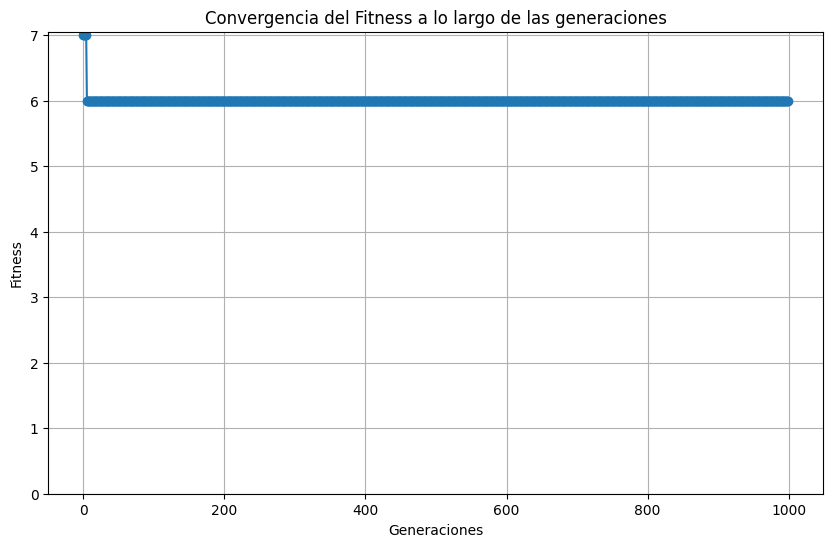

In [86]:
#instancia 1
matrizA=matriz1
celdas=celdas1
maquinas=maquinas1
maxMPC=maxMPC1
piezas=piezas1
NUM_GENERATIONS = 100
POPULATION_SIZE = 50
MUTATION_RATE = 0.2

# Instancia fuerza bruta
matrizB = crearB(matrizA,celdas, maquinas, maxMPC)
matrizC = crearC(matrizA,celdas, piezas)

valor_objetivo = calcular_funcion_objetivo(matrizA, matrizB, matrizC, celdas, maquinas, piezas)
print(f"Resultado fuerza bruta:valor de la función objetivo es: {valor_objetivo}")

tiempo_inicial=time.time()

# Ejecución de la Instancia 1
mejor_individuo, fitness_generaciones = algoritmo_genetico(matrizA, celdas, maquinas, maxMPC, piezas, NUM_GENERATIONS, POPULATION_SIZE, MUTATION_RATE)

tiempo_final=time.time()
tiempo_ejecucion=tiempo_final-tiempo_inicial

tiempo_final=time.time()
tiempo_ejecucion=tiempo_final-tiempo_inicial
# Resultado final
print(matrizA)
print("Mejor individuo final:")
print("Matriz B:")
print(mejor_individuo[0])
print("Matriz C:")
print(mejor_individuo[1])
print(f"Mejor valor de la función objetivo: {mejor_individuo[2]}")
print("Tiempo de ejecuciion",tiempo_ejecucion)
Graficar_convergencia(fitness_generaciones)

Resultado fuerza bruta:valor de la función objetivo es: 73
Generación 1: Mejor valor objetivo = 66
Generación 2: Mejor valor objetivo = 62
Generación 3: Mejor valor objetivo = 59
Generación 4: Mejor valor objetivo = 56
Generación 5: Mejor valor objetivo = 55
Generación 6: Mejor valor objetivo = 55
Generación 7: Mejor valor objetivo = 54
Generación 8: Mejor valor objetivo = 54
Generación 9: Mejor valor objetivo = 54
Generación 10: Mejor valor objetivo = 54
Generación 11: Mejor valor objetivo = 54
Generación 12: Mejor valor objetivo = 54
Generación 13: Mejor valor objetivo = 54
Generación 14: Mejor valor objetivo = 53
Generación 15: Mejor valor objetivo = 53
Generación 16: Mejor valor objetivo = 53
Generación 17: Mejor valor objetivo = 53
Generación 18: Mejor valor objetivo = 53
Generación 19: Mejor valor objetivo = 53
Generación 20: Mejor valor objetivo = 53
Generación 21: Mejor valor objetivo = 53
Generación 22: Mejor valor objetivo = 53
Generación 23: Mejor valor objetivo = 53
Generac

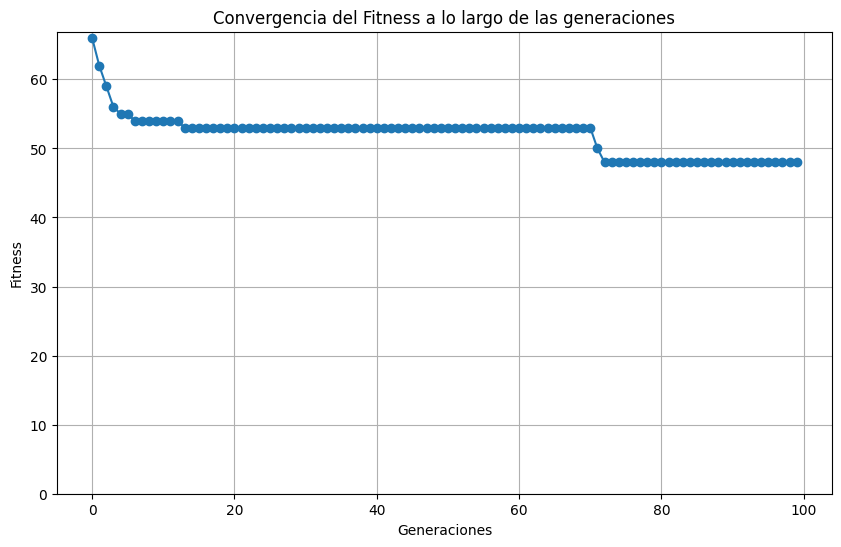

In [229]:
#instancia 2
matrizA=matriz2
celdas=celdas2
maquinas=maquinas2
maxMPC=maxMPC2
piezas=piezas2
NUM_GENERATIONS = 100
POPULATION_SIZE = 200
MUTATION_RATE = 0.2
# Instancia fuerza bruta
matrizB = crearB(celdas, maquinas, maxMPC)
matrizC = crearC(celdas, piezas)

valor_objetivo = calcular_funcion_objetivo(matrizA, matrizB, matrizC, celdas, maquinas, piezas)
print(f"Resultado fuerza bruta:valor de la función objetivo es: {valor_objetivo}")

tiempo_inicial=time.time()

# Ejecución de la Instancia 2
mejor_individuo, fitness_generaciones = algoritmo_genetico(matrizA, celdas, maquinas, maxMPC, piezas, NUM_GENERATIONS, POPULATION_SIZE, MUTATION_RATE)

tiempo_final=time.time()
tiempo_ejecucion=tiempo_final-tiempo_inicial


print(matrizA)
print("Mejor individuo final:")
print("Matriz B:")
print(mejor_individuo[0])
print("Matriz C:")
print(mejor_individuo[1])
print(f"Mejor valor de la función objetivo: {mejor_individuo[2]}")
print("Tiempo de ejecuciion",tiempo_ejecucion)
Graficar_convergencia(fitness_generaciones)


Resultado fuerza bruta:valor de la función objetivo es: 68
Generación 1: Mejor valor objetivo = 58
Generación 2: Mejor valor objetivo = 58
Generación 3: Mejor valor objetivo = 56
Generación 4: Mejor valor objetivo = 54
Generación 5: Mejor valor objetivo = 53
Generación 6: Mejor valor objetivo = 52
Generación 7: Mejor valor objetivo = 52
Generación 8: Mejor valor objetivo = 52
Generación 9: Mejor valor objetivo = 48
Generación 10: Mejor valor objetivo = 48
Generación 11: Mejor valor objetivo = 47
Generación 12: Mejor valor objetivo = 47
Generación 13: Mejor valor objetivo = 46
Generación 14: Mejor valor objetivo = 45
Generación 15: Mejor valor objetivo = 45
Generación 16: Mejor valor objetivo = 45
Generación 17: Mejor valor objetivo = 44
Generación 18: Mejor valor objetivo = 43
Generación 19: Mejor valor objetivo = 43
Generación 20: Mejor valor objetivo = 43
Generación 21: Mejor valor objetivo = 43
Generación 22: Mejor valor objetivo = 42
Generación 23: Mejor valor objetivo = 42
Generac

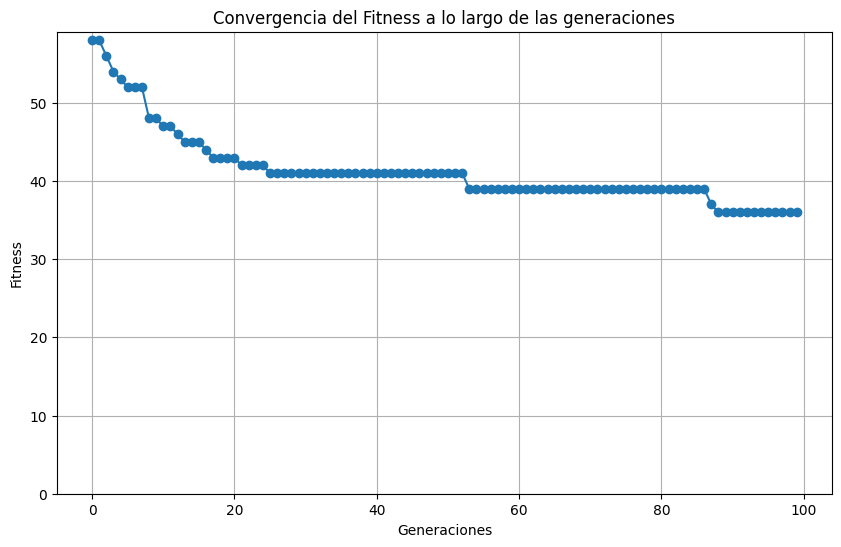

In [233]:
#instancia 3
matrizA=matriz3
celdas=celdas3
maquinas=maquinas3
maxMPC=maxMPC3
piezas=piezas3
NUM_GENERATIONS = 100
POPULATION_SIZE = 50
MUTATION_RATE = 0.2

# Instancia fuerza bruta
matrizB = crearB(celdas, maquinas, maxMPC)
matrizC = crearC(celdas, piezas)

valor_objetivo = calcular_funcion_objetivo(matrizA, matrizB, matrizC, celdas, maquinas, piezas)
print(f"Resultado fuerza bruta:valor de la función objetivo es: {valor_objetivo}")

tiempo_inicial=time.time()

# Ejecución de la Instancia 3
mejor_individuo, fitness_generaciones = algoritmo_genetico(matrizA, celdas, maquinas, maxMPC, piezas, NUM_GENERATIONS, POPULATION_SIZE, MUTATION_RATE)

tiempo_final=time.time()
tiempo_ejecucion=tiempo_final-tiempo_inicial


print("Matriz A:")
print(matrizA)
print("Mejor individuo final:")
print("Matriz B:")
print(mejor_individuo[0])
print("Matriz C:")
print(mejor_individuo[1])
print(f"Mejor valor de la función objetivo: {mejor_individuo[2]}")
print("Tiempo de ejecuciion",tiempo_ejecucion)
Graficar_convergencia(fitness_generaciones)

In [101]:
def ejecutarInstancia(piezas,maquinas,celdas, maxMPC, matrizA, num_generaciones, pop_size, mutation_rate):
  # Iterar 10 veces
  resultados = []

  for iteracion in range(10):
    
      # Inicializar la población
      poblacion = generar_poblacion_inicial(matrizA,pop_size, celdas, maquinas, maxMPC, piezas)
      mejor_individuo_inicial = poblacion[0]

      for generacion in range(num_generaciones):

        descendientes = []
        poblacion_copia = poblacion.copy()

        for _ in range(POPULATION_SIZE // 2):
            
            padres = seleccionar_padres(poblacion_copia)
          
            poblacion_copia = eliminar_padres(poblacion_copia, padres)
            
            while True:
                
                (B1, C1), (B2, C2) = cruce_dos_puntos(padres[0][0], padres[0][1], padres[1][0], padres[1][1], celdas, maquinas, piezas)
                
                B1,C1 = mutacion_columnas(B1, C1, celdas, maquinas, piezas, mutation_rate)
                B2,C2 = mutacion_columnas(B2, C2, celdas, maquinas, piezas, MUTATION_RATE)


                if verificar_solucion(B1, C1, maquinas, piezas, celdas, maxMPC) and verificar_solucion(B2, C2, maquinas, piezas, celdas, maxMPC):
                    break

            fitness1 = calcular_funcion_objetivo(matrizA, B1, C1, celdas, maquinas, piezas)
            fitness2 = calcular_funcion_objetivo(matrizA, B2, C2, celdas, maquinas, piezas)
            descendientes.append((B1, C1, fitness1))
            descendientes.append((B2, C2, fitness2))

        poblacion = reemplazo(poblacion, descendientes,POPULATION_SIZE)
        
        mejor_individuo = poblacion[0]
        fitness_generaciones.append(mejor_individuo[2])

      resultados.append({
          "iteracion": iteracion+1,
          "fitness_inicial": mejor_individuo_inicial[2],
          "fitness_final": mejor_individuo[2]
          
      })

  # Crear un DataFrame con los resultados
  df_resultados = pd.DataFrame(resultados)

  # Imprimir el DataFrame
  print(df_resultados)

  # Calcular estadísticas
  media_inicial = df_resultados['fitness_inicial'].mean()
  media_final = df_resultados['fitness_final'].mean()

  std_inicial = df_resultados['fitness_inicial'].std()
  std_final = df_resultados['fitness_final'].std()

  # Imprimir estadísticas
  print(f"Media de la función objetivo inicial: {media_inicial}")
  print(f"Desviación estándar de la función objetivo inicial: {std_inicial}")

  print(f"Media de la función objetivo final: {media_final}")
  print(f"Desviación estándar de la función objetivo final: {std_final}")


NUM_GENERATIONS = 100
POPULATION_SIZE = 50
MUTATION_RATE = 0.2

#instancia 1
ejecutarInstancia(piezas1,maquinas1,celdas1, maxMPC1, matriz1, NUM_GENERATIONS, POPULATION_SIZE, MUTATION_RATE)

#instancia 2
ejecutarInstancia(piezas2,maquinas2,celdas2, maxMPC2, matriz2, NUM_GENERATIONS, POPULATION_SIZE, MUTATION_RATE)

#instancia 3
ejecutarInstancia(piezas3,maquinas3,celdas3, maxMPC3, matriz3, NUM_GENERATIONS, POPULATION_SIZE, MUTATION_RATE)

   iteracion  fitness_inicial  fitness_final
0          1               11              7
1          2                8              6
2          3               12              6
3          4                8              6
4          5               10              6
5          6               14              6
6          7                9              6
7          8               10              6
8          9               10              7
9         10                8              6
Media de la función objetivo inicial: 10.0
Desviación estándar de la función objetivo inicial: 1.9436506316151
Media de la función objetivo final: 6.2
Desviación estándar de la función objetivo final: 0.4216370213557839
   iteracion  fitness_inicial  fitness_final
0          1               76             52
1          2               75             52
2          3               86             58
3          4               79             60
4          5               86             51
5          6   